In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

path17 = "H:/Datasets/SiamoisTest/imagettes/2017/"
path21 = "H:/Datasets/SiamoisTest/imagettes/2021/"
path17_cmatched = "H:/Datasets/SiamoisTest/imagettes/2017_histo_matched/"

In [2]:
def plot_couple(i,j):
    img1 = Image.open(path17+i)
    img2 = Image.open(path21+j)
    # Convert the images to numpy arrays
    array1 = np.array(img1)
    array2 = np.array(img2)

    result = Image.fromarray(np.hstack((array1, array2)))

    fig = plt.figure(figsize=(12, 6)) 
    plt.imshow(result)
    plt.axis("off")

In [3]:
def fusion_images_norm(name1,name2):
    img1 = cv2.imread(path17+name1)
    img2 = cv2.imread(path21+name2)

    # Normalize the image
    img1_normalized = cv2.normalize(img1, None, 0, 1,cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    img2_normalized = cv2.normalize(img2, None, 0, 1,cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    result = cv2.hconcat([img1_normalized,img2_normalized])
    # visualize the normalized image
    plt.imshow(result)
    plt.axis('off')
    plt.show()

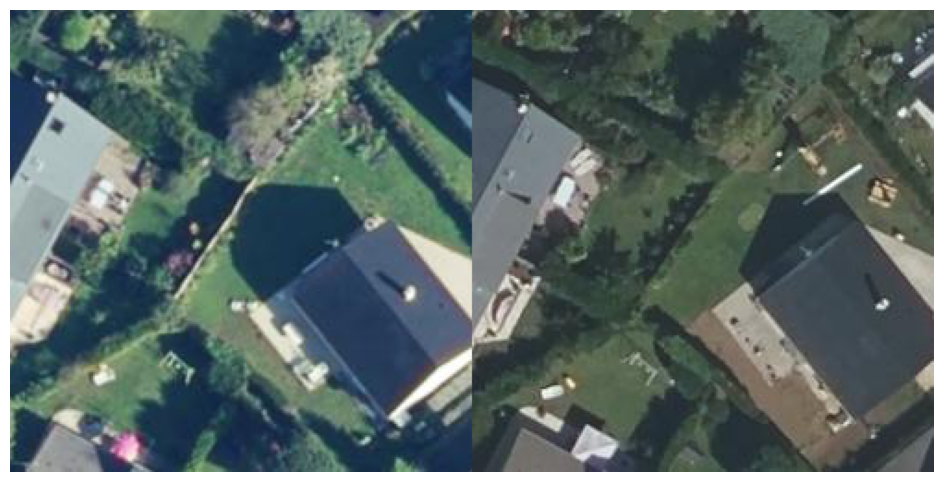

In [4]:
plot_couple("2017_0_0.jpg","2021_0_0.jpg")

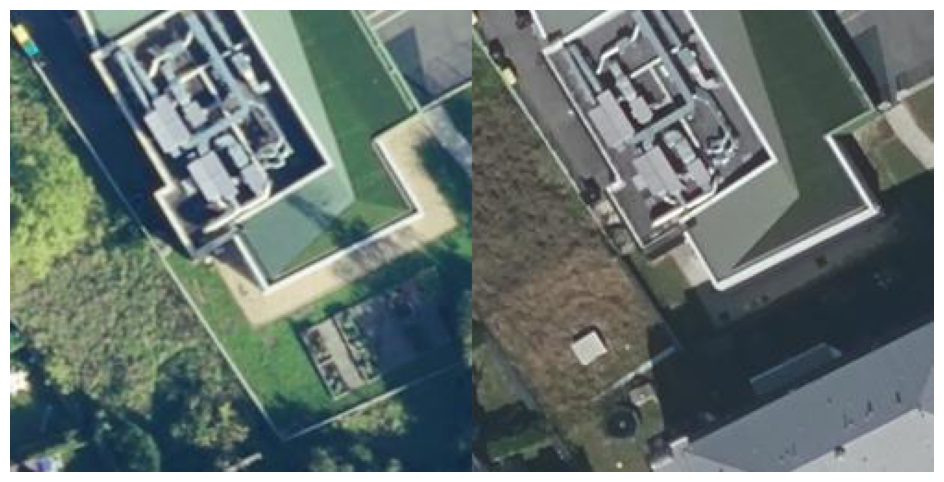

In [5]:
plot_couple("2017_16_15.jpg","2021_16_15.jpg")

Euclidean Distance : 78.06212492586023 
Norm p=1 : 10337.827450976381 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Norm p=2 : 78.06212492586023 
Norm p=6 : 2.485642645745253 
Euclidean Distance : 113.70788024577747 
Norm p=1 : 6662.560784310843 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Norm p=2 : 113.70788024577747 
Norm p=6 : 3.0423659656804305 


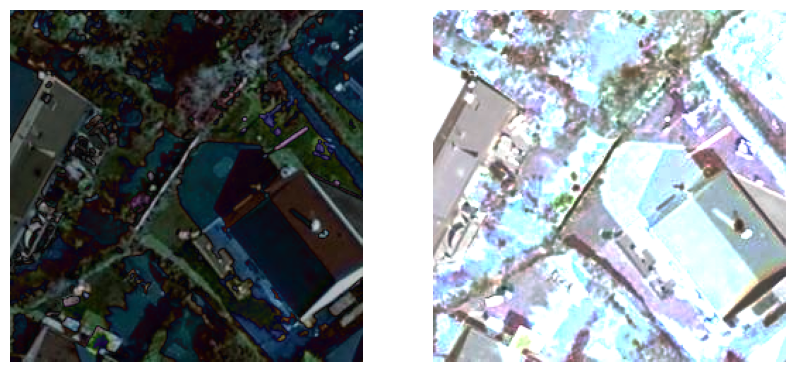

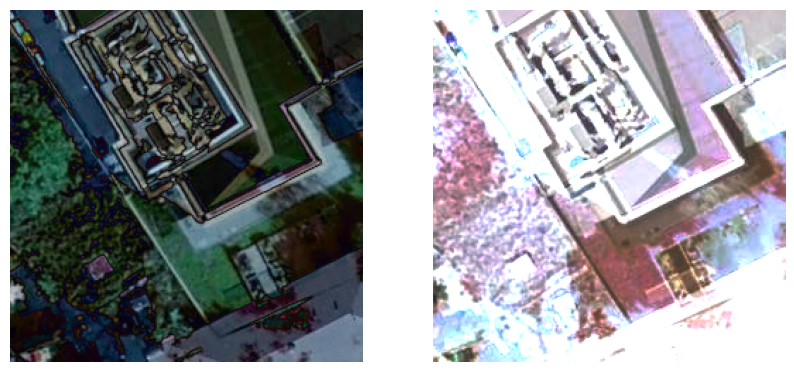

In [6]:
def Euclidean_Distance(im1,im2):
    height,width,channel = im1.shape
    diff = 0
    for c in range(channel):
        for h in range(height):
            for w in range(width):
                diff += (im1[h][w][c] - im2[h][w][c])**2
                # print(im1[h][w][c])
                # print(im2[h][w][c])
                # print(diff)

    return np.sqrt(diff)

def norm_p(im1,im2,p=1):
    height,width,channel = im1.shape
    diff = 0
    for c in range(channel):
        for h in range(height):
            for w in range(width):
                diff += (im1[h][w][c] - im2[h][w][c])**p
    return diff**(1/p)

def Diff(im1,im2):
    return np.abs(im2-im1)

def Ratio(im1,im2):
    return im2/im1

def Test(name1,name2):
    img1 = cv2.imread(path17+name1)
    img2 = cv2.imread(path21+name2)
    img1 = img1/255
    img2 = img2/255
    dist_eucl = Euclidean_Distance(img1,img2)
    print("Euclidean Distance : {} ".format(dist_eucl))
    norm_1 = norm_p(img1,img2,1)
    print("Norm p=1 : {} ".format(norm_1))
    norm_2 = norm_p(img1,img2,2) # ie norme euclidienne
    print("Norm p=2 : {} ".format(norm_2))
    norm_6 = norm_p(img1,img2,6)
    print("Norm p=6 : {} ".format(norm_6))
    
    rat = Ratio(img1,img2)
    diff = Diff(img1,img2)
    # Create a Figure object
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(diff)
    ax[0].axis("off")
    ax[1].imshow(rat)
    ax[1].axis("off")
    # print("Ratio Distance : {} ".format(result))


Test("2017_0_0.jpg","2021_0_0.jpg")
Test("2017_16_15.jpg","2021_16_15.jpg")

Cosine Distance : 0.3516836042680621 
Cosine Distance : 0.36846971279482443 


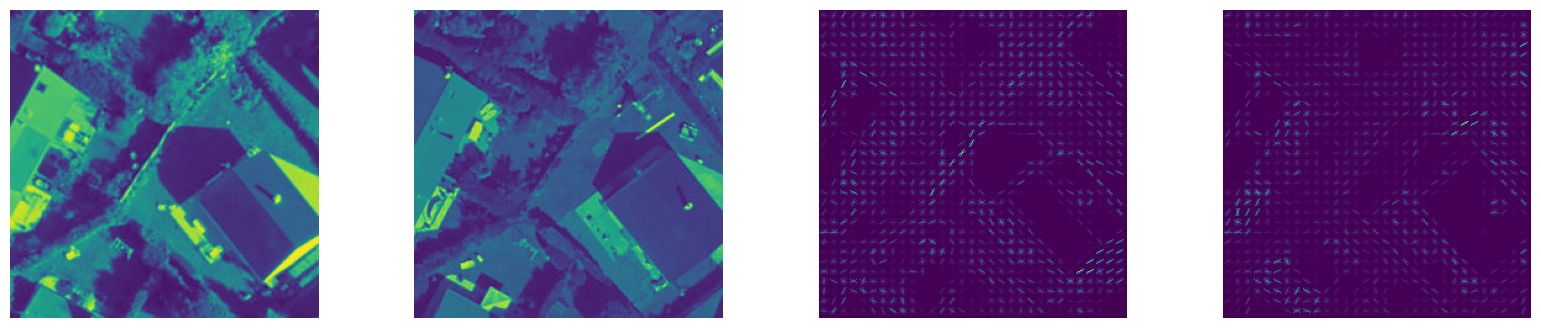

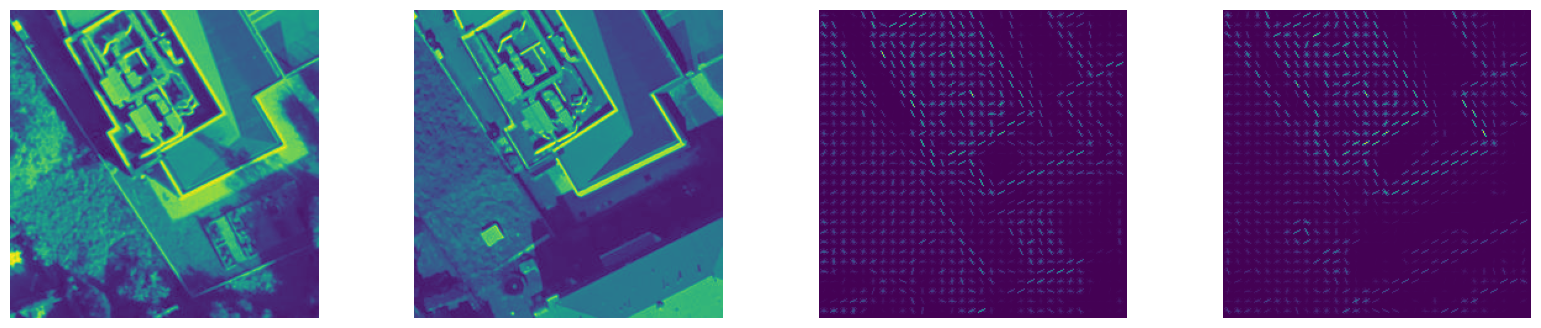

In [31]:
import skimage.feature as skfeat
import skimage.io as skio
from scipy.spatial.distance import cosine
from scipy import signal

def Cosine_Distance(features1,features2):
    return cosine(features1, features2)

def Test1(name1,name2):
    # Load the image
    img1 = skio.imread(path17+name1, as_gray=True)  # Load as grayscale
    img2 = skio.imread(path21+name2, as_gray=True)  # Load as grayscale
    # HOG : Histogram of Oriented Gradients
    # Calculate HOG features
    hog_features17, hog_image17 = skfeat.hog(img1, visualize=True)
    hog_features21, hog_image21 = skfeat.hog(img2, visualize=True)
    
    dist_eucl = Cosine_Distance(hog_features17,hog_features21)
    print("Cosine Distance : {} ".format(dist_eucl))
    
    # Calcul de la matrice de corrélation mais c'est pas utile
    # cor = signal.correlate2d(img1, img2)

    # Create a Figure object
    fig, ax = plt.subplots(1,4,figsize=(20,4))
    ax[0].imshow(img1)
    ax[0].axis("off")
    ax[1].imshow(img2)
    ax[1].axis("off")
    ax[2].imshow(hog_image17)
    ax[2].axis("off")
    ax[3].imshow(hog_image21)
    ax[3].axis("off")
    # ax[4].imshow(cor)
    # ax[4].axis("off")

Test1("2017_0_0.jpg","2021_0_0.jpg")
Test1("2017_16_15.jpg","2021_16_15.jpg")

In [29]:

def correlation_fun(image1,image2):
    # Flatten the image arrays to 1D arrays
    image1_flat = image1.flatten()
    image2_flat = image2.flatten()

    # Calculate the mean of each image
    mean1 = np.mean(image1_flat)
    mean2 = np.mean(image2_flat)

    # Calculate the standard deviation of each image
    std1 = np.std(image1_flat)
    std2 = np.std(image2_flat)

    # Calculate the Pearson correlation coefficient
    correlation = np.mean((image1_flat - mean1) * (image2_flat - mean2)) / (std1 * std2)
    return correlation

In [33]:
df = pd.read_csv("imagettes/labels_img.txt",sep=";")
array = df.to_numpy()
distances_euclid = []
distances_cosine = []
correlations = []

distances_euclid_matched = []
distances_cosine_matched = []
correlations_matched = []
for row in array:
    im1 = cv2.imread(path17+row[0]) / 255
    im2 = cv2.imread(path21+row[1]) / 255
    im_matched = cv2.imread(path17_cmatched+row[0]) / 255
    distances_euclid.append(Euclidean_Distance(im1,im2))
    distances_euclid_matched.append(Euclidean_Distance(im_matched,im2))

    correlations.append(correlation_fun(im1*255,im2*255))
    correlations_matched.append(correlation_fun(im_matched*255,im2*255))
    
    img1 = skio.imread(path17+row[0], as_gray=True)  # Load as grayscale
    img2 = skio.imread(path21+row[1], as_gray=True)  # Load as grayscale
    img_matched = skio.imread(path17_cmatched+row[0], as_gray=True)
    # Calculate HOG features
    hog_features17 = skfeat.hog(img1)
    hog_features21 = skfeat.hog(img2)
    hog_features17_matched = skfeat.hog(img_matched)
    distances_cosine.append(Cosine_Distance(hog_features17,hog_features21))
    distances_cosine_matched.append(Cosine_Distance(hog_features17_matched,hog_features21))
df["Euclidian_Distance"] = distances_euclid
df["Cosine_Distance"] = distances_cosine
df["Euclidian_Distance_matched"] = distances_euclid_matched
df["Cosine_Distance_matched"] = distances_cosine_matched
df["correlations"] = correlations
df["correlations_matched"] = correlations_matched

In [34]:
df

2017_name      2021_name  changed  Euclidian_Distance  \
0     2017_0_0.jpg   2021_0_0.jpg        0           78.062125   
1     2017_0_1.jpg   2021_0_1.jpg        0           87.705002   
2    2017_0_10.jpg  2021_0_10.jpg        0           71.384488   
3    2017_0_11.jpg  2021_0_11.jpg        0           91.354130   
4    2017_0_12.jpg  2021_0_12.jpg        0           92.199846   
..             ...            ...      ...                 ...   
395   2017_9_5.jpg   2021_9_5.jpg        0           95.321572   
396   2017_9_6.jpg   2021_9_6.jpg        0           90.550603   
397   2017_9_7.jpg   2021_9_7.jpg        0           88.126920   
398   2017_9_8.jpg   2021_9_8.jpg        0           72.530902   
399   2017_9_9.jpg   2021_9_9.jpg        0           68.658266   

     Cosine_Distance  Euclidian_Distance_matched  Cosine_Distance_matched  \
0           0.351684                   57.956654                 0.330969   
1           0.346404                   77.165600                 0.328947   
2           0.338511                   56.187192                 0.312593   
3           0.350921                   62.443195                 0.324624   
4           0.377581                   63.029201                 0.350098   
..               ...                         ...                      ...   
395         0.366029                   82.468922                 0.346989   
396         0.356316                   72.112485                 0.325664   
397         0.427189                   65.188057                 0.385672   
398         0.329575                   53.592591                 0.291586   
399         0.410086                   44.339387                 0.378361   

     correlations  correlations_matched  
0        0.506495              0.522029  
1        0.372023              0.402687  
2        0.481279              0.488703  
3        0.377167              0.383820  
4        0.334036              0.357175  
..            ...                   ...  
395      0.343709              0.356936  
396      0.435898              0.455736  
397      0.342457              0.357694  
398      0.228090              0.274706  
399      0.542662              0.625914  

[400 rows x 9 columns]

In [35]:
subset = df[df['changed'] == 1]
means_changed = subset.mean()
means_changed

D:\Profiles\Cytermann\AppData\Local\Temp\ipykernel_19488\1130902584.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means_changed = subset.mean()


changed                        1.000000
Euclidian_Distance            96.681524
Cosine_Distance                0.407024
Euclidian_Distance_matched    84.268423
Cosine_Distance_matched        0.385341
correlations                   0.201893
correlations_matched           0.214820
dtype: float64

In [36]:
subset.head(10)

2017_name       2021_name  changed  Euclidian_Distance  \
73    2017_12_3.jpg   2021_12_3.jpg        1          110.445750   
132   2017_15_2.jpg   2021_15_2.jpg        1           86.500404   
135   2017_15_5.jpg   2021_15_5.jpg        1           93.902974   
147  2017_16_15.jpg  2021_16_15.jpg        1          113.707880   
148  2017_16_16.jpg  2021_16_16.jpg        1          124.948055   
152   2017_16_2.jpg   2021_16_2.jpg        1           87.272322   
154   2017_16_4.jpg   2021_16_4.jpg        1           86.465534   
155   2017_16_5.jpg   2021_16_5.jpg        1           89.226717   
168  2017_17_16.jpg  2021_17_16.jpg        1          146.683469   
169  2017_17_17.jpg  2021_17_17.jpg        1           90.019134   

     Cosine_Distance  Euclidian_Distance_matched  Cosine_Distance_matched  \
73          0.416264                  110.117714                 0.412042   
132         0.384730                   74.394034                 0.353676   
135         0.385836                   90.045915                 0.360496   
147         0.368470                  102.551875                 0.358099   
148         0.548420                  112.875783                 0.494685   
152         0.395356                   75.936815                 0.371985   
154         0.393191                   73.402538                 0.368671   
155         0.383742                   78.014440                 0.347252   
168         0.491683                  139.458633                 0.468572   
169         0.452986                   73.098654                 0.404852   

     correlations  correlations_matched  
73       0.294371              0.285886  
132      0.306521              0.344956  
135      0.217489              0.230224  
147      0.028810              0.017348  
148      0.079406              0.089808  
152      0.416121              0.421667  
154      0.533560              0.552076  
155      0.422582              0.450754  
168     -0.089890             -0.107770  
169      0.270098              0.358687

In [37]:
notchanged = df[df['changed'] == 0]
means_notchanged = notchanged.mean()
means_notchanged

D:\Profiles\Cytermann\AppData\Local\Temp\ipykernel_19488\621446116.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means_notchanged = notchanged.mean()


changed                        0.000000
Euclidian_Distance            82.357708
Cosine_Distance                0.365488
Euclidian_Distance_matched    66.177106
Cosine_Distance_matched        0.343101
correlations                   0.365155
correlations_matched           0.393099
dtype: float64

In [41]:
subset.max()

2017_name                     2017_8_2.jpg
2021_name                     2021_8_2.jpg
changed                                  1
Euclidian_Distance              146.683469
Cosine_Distance                    0.54842
Euclidian_Distance_matched      139.458633
Cosine_Distance_matched           0.508715
correlations                       0.53356
correlations_matched              0.552076
dtype: object

In [39]:
means_changed - means_notchanged

changed                        1.000000
Euclidian_Distance            14.323816
Cosine_Distance                0.041536
Euclidian_Distance_matched    18.091317
Cosine_Distance_matched        0.042240
correlations                  -0.163262
correlations_matched          -0.178279
dtype: float64

Remarque on cherchera à enlever les ombres avant de match les histogrammes mais c'est prometteur

## Test corrélation

0.5064946355791567


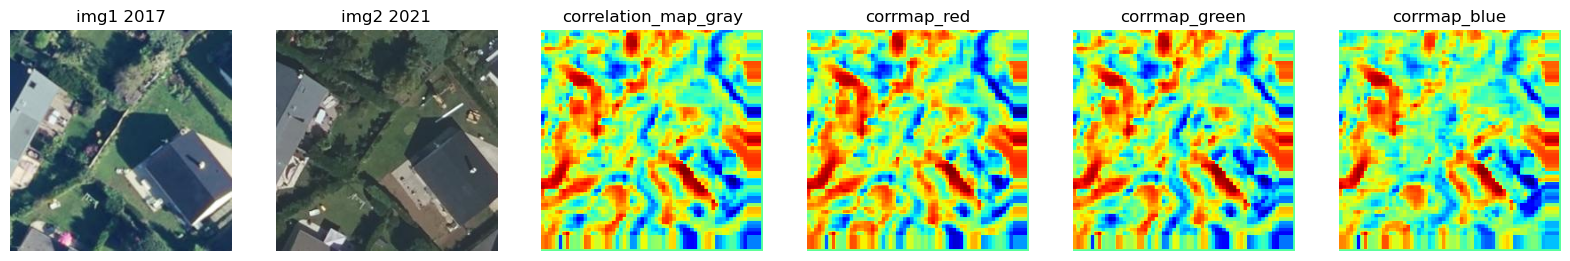

In [28]:


def corre_map(im1,im2):
    # Define the window size and stride
    window_size = (16, 16)  # Adjust the window size as needed
    stride = 4  # Adjust the stride as needed

    # Calculate the correlation between the images using sliding windows
    correlation_map = np.zeros_like(im1, dtype=float)

    for y in range(0, im1.shape[0] - window_size[0] + 1, stride):
        for x in range(0, im1.shape[1] - window_size[1] + 1, stride):
            window1 = im1[y:y+window_size[0], x:x+window_size[1]]
            window2 = im2[y:y+window_size[0], x:x+window_size[1]]
            correlation = np.corrcoef(window1.flatten(), window2.flatten())[0, 1]
            correlation_map[y:y+window_size[0], x:x+window_size[1]] = correlation
    return correlation_map

def Test(name1,name2):
    img1 = cv2.imread(path17+name1,)
    img2 = cv2.imread(path21+name2)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    
    corre = correlation_fun(img1,img2)
    print(corre)

    # Convert the images to grayscale if they are in color
    image1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    image2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

    im1_r,im1_g,im1_b = cv2.split(img1)
    im2_r,im2_g,im2_b = cv2.split(img2)

    correlation_map_gray = corre_map(image1_gray,image2_gray)
    corrmap_red = corre_map(im1_r,im2_r)
    corrmap_green = corre_map(im1_g,im2_g)
    corrmap_blue = corre_map(im1_b,im2_b)

    # Create a Figure object
    fig, ax = plt.subplots(1,6,figsize=(20,5))
    ax[0].imshow(img1)
    ax[0].axis("off")
    ax[0].set_title("img1 2017")
    ax[1].imshow(img2)
    ax[1].axis("off")
    ax[1].set_title("img2 2021")
    ax[2].imshow(correlation_map_gray, cmap='jet')
    ax[2].axis("off")
    ax[2].set_title("correlation_map_gray")
    ax[3].imshow(corrmap_red, cmap='jet')
    ax[3].axis("off")
    ax[3].set_title("corrmap_red")
    ax[4].imshow(corrmap_green, cmap='jet')
    ax[4].axis("off")
    ax[4].set_title("corrmap_green")
    ax[5].imshow(corrmap_blue, cmap='jet')
    ax[5].axis("off")
    ax[5].set_title("corrmap_blue")
    # # print("Ratio Distance : {} ".format(result))

Test("2017_0_0.jpg","2021_0_0.jpg")